# Code Audit

A full overview of the codebase, evaluating the workflow and systems. Problematic functions are highlighted and alternatives are proposed

# Utils

## base Utils
The different utility functions, and why they exist

In [4]:
from context import geomapi
import geomapi.utils as ut
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Conversions

Parsing strings to matrixes or numbers

In [ ]:
from rdflib import Literal
# strings
ut.literal_to_string("tralala")
ut.literal_to_string(Literal("tralala"))
# Number
ut.literal_to_int()
ut.literal_to_float()
#list
ut.literal_to_list()
#time
ut.literal_to_datetime()
#matrix
ut.literal_to_matrix()

### `def literal_to_python()`

Literals are pretty much always strings
to python only converts them to float or int, to number seems more appropriate

In [ ]:
print(ut.literal_to_number("10"))


In [ ]:
ut.literal_to_float("5")


### `def literal_to_list()`

In [ ]:
print(ut.string_to_list("[1,2,3]")[0])
print(ut.literal_to_list("[5,ei,5.0]"))
print(ut.literal_to_list(5.0))

In [ ]:
ut.string_to_rotation_matrix() #delete

### `def check_if_subject_is_in_graph()`

In [ ]:
from rdflib import Graph
imgGraphPath= r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\graphs\mesh_graph.ttl"
imgGraph=Graph().parse(str(imgGraphPath))
for s in imgGraph.subjects():
    print(s)

## CADUtils

In [ ]:
from context import geomapi
import geomapi.utils.cadutils as cu
import numpy as np
%load_ext autoreload
%autoreload 2

### `calculate_perpendicular_distance()`

perpendicular is loodrecht. de afstand tussen 2 loodrechte lijnen is altijd 0
at is deze functie wordt berekend is de kleinst afstand tussen het snijpunt van de lijnen en het startpunt van beide lijnen

In [ ]:
point1 = [2,2]
point2 = [0,0]
point3 = [0,1]
point4 = [1,1]
distance = 1
cu.calculate_perpendicular_distance([point1, point2],[point3, point4])

### `mesh_to_o3d()`

not implemented

### `get_linesets_inliers_in_box()`

this function seems to require too many inputs that can be calculated itself, if this is usefull at all

In [ ]:
import open3d as o3d

cu.get_linesets_inliers_in_box()

points = o3d.utility.Vector3dVector([[0,0,0],[1.0,0,0]])
lines = o3d.utility.Vector2iVector([[0,1]])
lineset = o3d.geometry.LineSet(points = points, lines = lines)
cu.sample_pcd_from_linesets([lineset])


## Geometry Utils

Geometryutils has a lot of functions, They can be filtered and grouped

In [ ]:
from geomapi.utils import geometryutils as gmu

In [ ]:
import open3d as o3d
tri = gmu.mesh_to_trimesh(o3d.io.read_triangle_mesh(r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\mesh\old_state.obj"))

### `crop_mesh_by_convex_hull()`

This function requires a trimesh mesh, while all the others are open3d

In [ ]:
gmu.crop_mesh_by_convex_hull()

### `get_points_and_normals()`

- why added transform?
- only half finished

In [ ]:
gmu.get_points_and_normals()

### `gmu.compute_nearest_neighbor_with_normal_filtering()`

Combine the 2 functions

In [ ]:
from geomapi.utils import geometryutils as gmu
gmu.compute_nearest_neighbor_with_normal_filtering()
gmu.compute_nearest_neighbors()

### Distance querries

I think we can reduse this by a lot
- filter_geometry_by_distance (source, target, distance)
- filter_geometry(source, target)

In [ ]:
gmu.create_visible_point_cloud_from_meshes()
gmu.crop_dataframe_from_meshes()
gmu.crop_geometry_by_box()
gmu.crop_geometry_by_distance() # Returns the portion of a pointcloud that lies within a range of another mesh/point cloud.
gmu.crop_geometry_by_raycasting()
gmu.crop_mesh_by_convex_hull() # trimesh cropping
gmu.crop_point_cloud_from_meshes()
gmu.filter_geometry_by_distance() # selects parts of a geometry that are within a certain distance from a single point
gmu.filter_pcd_by_distance() # selects the points that are within a certain distance from the other pointcloud
gmu.get_box_inliers()
gmu.get_box_intersections()
gmu.get_mesh_inliers()
gmu.get_pcd_collisions()
gmu.get_indices_in_hull()
gmu.get_points_in_hull() # returns points inside and outside convex hull

### `get_mesh_representation()`

just converts to convex hull of pointcloud

In [ ]:
gmu.get_mesh_representation()

### `project_meshes_to_rgbd_images()`

- I feel this works better as a tool function to fill a bunch of image nodes from a mesh and cam parameters
- also why is this not just a screenshot function in open3d?

In [ ]:
import open3d
gmu.project_meshes_to_rgbd_images()
# vb: open3d.visualization.rendering.OffscreenRenderer().render_to_depth_image()

### `get_data3d_from_pcd()`
- fix function name to indicate E57

In [ ]:
gmu.get_data3d_from_pcd()

### `describe_element()`

- very vague function name
- Takes the columns of a dataframe and builds a ply-like description.

In [ ]:
gmu.describe_element()

### `img_to_arrays()`
- should be in imageutils, also just reads an image
- what is tasknummer??, purely for multiprocessing (put it in a wrapper function?)

In [ ]:
gmu.img_to_arrays()

def number_function(nr: int, func, *args):
    return nr, func(*args)

### `generate_visual_cone_from_image()`
- create frustrum instead

In [ ]:
gmu.generate_visual_cone_from_image()

### `get_convex_hull()`

- convex hulls of 2D objects should either be a fixed offset box or a 2d shape, not a randomly slightly enlarged box

In [ ]:
gmu.get_convex_hull(np.array([[0,0,0],[1,0,0],[2,0,0]]))

In [49]:
import numpy as np
import open3d as o3d

def add_minimal_thickness(point_cloud, thickness=1e-3):
    """Ensures the point cloud has a minimal thickness for OBB calculation."""
    points = np.asarray(point_cloud.points)
    num_points = len(points)

    if num_points == 1:
        # Single point: Expand into a small cube
        center = points[0]
        cube_size = thickness 
        offsets = np.array([[x, y, z] for x in [-1, 1] for y in [-1, 1] for z in [-1, 1]]) * cube_size
        new_points = center + offsets
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(new_points))

    elif num_points == 2:
        # Two points: Expand into a thin box around the line
        line_vec = points[1] - points[0]
        line_vec /= np.linalg.norm(line_vec)

        # Find two perpendicular vectors
        arbitrary_vec = np.array([1, 0, 0])
        if np.allclose(line_vec, arbitrary_vec) or np.allclose(line_vec, -arbitrary_vec):
            arbitrary_vec = np.array([0, 1, 0])  # Use Y axis if the line is along X

        perp1 = np.cross(line_vec, arbitrary_vec)
        perp1 /= np.linalg.norm(perp1)
        perp2 = np.cross(line_vec, perp1)

        # Expand the points in a thin rectangle around the line
        new_points = np.vstack([
            points,
            points + perp1 * thickness, points - perp1 * thickness,
            points + perp2 * thickness, points - perp2 * thickness
        ])
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(new_points))

    # General case: PCA to detect coplanarity or colinearity
    cov = np.cov(points.T)
    eigvals, eigvecs = np.linalg.eigh(cov)

    eigvals_sorted = np.argsort(eigvals)
    smallest_eigval = eigvals[eigvals_sorted[0]]
    second_smallest_eigval = eigvals[eigvals_sorted[1]]
    
    normal = eigvecs[:, eigvals_sorted[0]]  # Smallest eigenvector is normal
    
    if smallest_eigval < 1e-8:  # Nearly zero eigenvalue → points are colinear
        line_vec = eigvecs[:, eigvals_sorted[2]]  # Largest eigenvector is along the line

        # Find two perpendicular vectors
        arbitrary_vec = np.array([1, 0, 0])
        if np.allclose(line_vec, arbitrary_vec) or np.allclose(line_vec, -arbitrary_vec):
            arbitrary_vec = np.array([0, 1, 0])

        perp1 = np.cross(line_vec, arbitrary_vec)
        perp1 /= np.linalg.norm(perp1)
        perp2 = np.cross(line_vec, perp1)

        # Expand the points in a thin box around the line
        new_points = np.vstack([
            points,
            points + perp1 * thickness, points - perp1 * thickness,
            points + perp2 * thickness, points - perp2 * thickness
        ])
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(new_points))

    elif second_smallest_eigval < 1e-8:  # Two small eigenvalues → points are coplanar
        # Expand in the direction of the normal
        new_points = np.vstack([points, points + normal * thickness, points - normal * thickness])
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(new_points))

    return point_cloud  # Fully 3D distributed points, no changes needed


# Example cases
def test_point_cloud_variants():
    """Test the function with different degenerate cases."""
    cases = {
        "Single Point": np.array([[1.0, 2.0, 3.0]]),
        "Two Points": np.array([[0, 0, 0], [1, 1, 1]]),
        "Colinear Points": np.array([[i, i/2, i/3] for i in range(10)]),
        "Coplanar Points": np.array([[i, j, 0] for i in range(5) for j in range(5)]),
        "3D Distributed Points": np.random.rand(10, 3),
    }

    for name, points in cases.items():
        print(f"Testing: {name}")
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points)

        thickened_pcd = add_minimal_thickness(pcd)
        obb = thickened_pcd.get_oriented_bounding_box()
        obb.color = (1, 0, 0)

        print(f"{name} - OBB Computed Successfully")
        o3d.visualization.draw_geometries([thickened_pcd, obb])

# Run tests
test_point_cloud_variants()



Testing: Single Point
Single Point - OBB Computed Successfully
Testing: Two Points
Two Points - OBB Computed Successfully
Testing: Colinear Points
Colinear Points - OBB Computed Successfully
Testing: Coplanar Points
Coplanar Points - OBB Computed Successfully
Testing: 3D Distributed Points
3D Distributed Points - OBB Computed Successfully


In [65]:
np.array([1, 2, 3, 4, 5, 6]).shape == (6,)
np.array([1, 2, 3, 4, 5, 6]).size

6

In [4]:
import numpy as np
import open3d as o3d
from scipy.spatial.transform import Rotation as R

def extract_points(geometry):
    """Extracts points from PointCloud, TriangleMesh, LineSet, or NumPy array."""
    if isinstance(geometry, np.ndarray):
        if geometry.ndim == 1 and geometry.size == 6: # [xMin,xMax,yMin,yMax,zMin,zMax]
            return np.asarray(ut.get_oriented_bounds(geometry))
        elif geometry.ndim == 1 and geometry.size == 9: #  [center(3),extent(3),euler_angles(3)]
            center=geometry[:3]
            extent=geometry[3:6]
            euler_angles=geometry[6:9]        
            rotation_matrix = R.from_euler('xyz', euler_angles, degrees=True).as_matrix()
            box = o3d.geometry.OrientedBoundingBox(center, rotation_matrix, extent)
            return np.asarray(box.get_box_points())
        if geometry.ndim != 2 or geometry.shape[1] != 3:
            raise ValueError("NumPy array must have shape (N, 3)")
        return geometry
    elif isinstance(geometry, (o3d.geometry.PointCloud,  o3d.geometry.LineSet)):
        return np.asarray(geometry.points)
    elif isinstance(geometry, o3d.geometry.TriangleMesh):
        return np.asarray(geometry.vertices)
    elif isinstance(geometry, o3d.geometry.OrientedBoundingBox):
        return np.asarray(geometry.get_box_points())
    else:
        raise TypeError("Unsupported geometry type. Use PointCloud, TriangleMesh, LineSet, or NumPy array.")

def preprocess_points_for_geometry(points, thickness=1e-3):
    """Handles special cases: single point, colinear, and coplanar points."""
    if len(points) == 1:
        # Single point: Expand to a small cube
        offsets = np.array([[x, y, z] for x in [-1, 1] for y in [-1, 1] for z in [-1, 1]]) * thickness * 10
        return points + offsets
    
    elif len(points) == 2 or np.linalg.matrix_rank(points - points.mean(axis=0)) == 1:
        # Colinear case: Expand perpendicularly
        line_vec = points[-1] - points[0]
        line_vec = line_vec / np.linalg.norm(line_vec)

        arbitrary_vec = np.array([1, 0, 0])
        if np.allclose(line_vec, arbitrary_vec) or np.allclose(line_vec, -arbitrary_vec):
            arbitrary_vec = np.array([0, 1, 0])

        perp1 = np.cross(line_vec, arbitrary_vec)
        perp1 = perp1 / np.linalg.norm(perp1)
        perp2 = np.cross(line_vec, perp1)

        return np.vstack([points, points + perp1 * thickness, points - perp1 * thickness,
                                  points + perp2 * thickness, points - perp2 * thickness])

    elif np.linalg.matrix_rank(points - points.mean(axis=0)) == 2:
        # Coplanar case: Add minimal thickness
        cov = np.cov(points.T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        normal = eigvecs[:, np.argmin(eigvals)]  # Smallest eigenvector
        return np.vstack([points, points + normal * thickness, points - normal * thickness])

    return points  # If already 3D, return as-is

def get_oriented_bounding_box(geometry, thickness=1e-3):
    """Computes the Oriented Bounding Box (OBB) for PointCloud, Mesh, LineSet, or NumPy array."""
    points = extract_points(geometry)
    points = preprocess_points_for_geometry(points, thickness)

    # Convert to point cloud and compute OBB
    pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))
    return pcd.get_oriented_bounding_box()

def get_convex_hull(geometry, thickness=1e-3):
    """Computes the Convex Hull for PointCloud, Mesh, LineSet, or NumPy array."""
    points = extract_points(geometry)
    points = preprocess_points_for_geometry(points, thickness)

    pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))
    hull, _ = pcd.compute_convex_hull()
    hull.paint_uniform_color([0.0, 1.0, 0.0])# Green for visualization
    return hull


# Define test cases
cases = {
    "Single Point": np.array([[1.0, 2.0, 3.0]]),
    "Two Points": np.array([[0, 0, 0], [1, 1, 1]]),
    "Colinear Points": np.array([[i, i, i] for i in range(10)]),
    "Coplanar Points": np.array([[i, j, 0] for i in range(5) for j in range(5)]),
    "3D Distributed Points": np.random.rand(10, 3),
    "Mesh (Cube)": o3d.geometry.TriangleMesh.create_box(),
    "LineSet": o3d.geometry.LineSet(points=o3d.utility.Vector3dVector([[0, 0, 0], [1, 1, 1], [2, 2, 2]]), lines = o3d.utility.Vector2iVector(np.array([[0,1],[1,2],[2,3]]))),
    "Lineset2": o3d.io.read_line_set(r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\cad\line.ply")
}

for name, geom in cases.items():
    print(f"Testing: {name}")
    obb = get_oriented_bounding_box(geom)
    hull = get_convex_hull(geom)

    obb.color = (1, 0, 0)  # Red

    # Convert NumPy arrays into PointClouds for visualization
    if isinstance(geom, np.ndarray):
        geom = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(geom))

    o3d.visualization.draw_geometries([geom, obb, hull])


Testing: Single Point
Testing: Two Points
Testing: Colinear Points
Testing: Coplanar Points
Testing: 3D Distributed Points
Testing: Mesh (Cube)
Testing: LineSet
Testing: Lineset2


In [3]:
import numpy as np

np.shape(np.array([1,2,3]))

(3,)

In [44]:
import geomapi.utils
import geomapi.utils.geometryutils as gmu
import numpy as np

gmu.get_oriented_bounding_box(np.array([0,0,0]))

RuntimeError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 4)

While executing:  | qhull Qt
Options selected for Qhull 2020.2.r 2020/08/31:
  run-id 837418076  Qtriangulate  _pre-merge  _zero-centrum  _maxoutside  0


In [ ]:
def get_oriented_bounding_box(value:np.ndarray |type[o3d.geometry.Geometry], degrees = False)->o3d.geometry.OrientedBoundingBox:
    """Get an Open3D OrientedBoundingBox from various inputs. 

    Args:
        value: One of the following inputs:
            - cartesianBounds (np.array): [xMin,xMax,yMin,yMax,zMin,zMax]
            - orientedBounds (np.array): [8x3] bounding points
            - parameters (np.array): [center,extent,euler_angles] (in radians)
            - Open3D TriangleMesh
            - Open3D PointCloud
            - Open3D LineSet 
            - array of 3D points (np.array): [nx3] n>3 else confused by parameter array
            - o3d.utility.Vector3dVector
        degrees (False): Are the parameters in radians(default) or degrees 


    Returns:
        o3d.geometry.OrientedBoundingBox
    """

### `get_oriented_bounding_box()`
- same as convex hull

In [ ]:
from geomapi.utils import geometryutils as gmu
import quaternion
# Test with parameters (center, extent, euler_angles)
parameters = np.array([
    [4, 5, 6],  # Center
    [1, 2, 3],  # Extent
    [0, np.pi, 0]   # Euler angles (no rotation)
])
obb = gmu.get_oriented_bounding_box(parameters)
print(obb.R)
quaternion.as_euler_angles(quaternion.from_rotation_matrix(obb.R)) * 180/np.pi

In [ ]:
# going back and forth to eulers can change rotations, except for very basic ones like 90 deg
center = [0, 0, 0]
extent = [1, 2, 3]
euler_angles = [90, 0, 0]
euler_angles2 = [60, 80, 60]

obb = gmu.get_oriented_bounding_box(np.array([center, extent, euler_angles]), True)
obb2 = gmu.get_oriented_bounding_box(np.array([center, extent, euler_angles2]), True)
print(gmu.get_oriented_bounding_box_parameters(obb))
print(gmu.get_oriented_bounding_box_parameters(obb2))


### `create_ellipsoid_mesh()`
- why does this exist?
-monkey patch into open3d?

In [ ]:
gmu.create_ellipsoid_mesh()

### Geometric operators

- join_geometries (booleans)
  - intersection
  - union
  - difference

In [ ]:
gmu.join_geometries()

## ImageUtils

In [ ]:
from geomapi.utils import imageutils as iu

### `fill_black_pixels()`

- function name unclear
- edge detection cleanup?

In [ ]:
iu.fill_black_pixels()

In [ ]:
from geomapi.nodes import ImageNode

node = ImageNode()

node.world_to_pixel_coordinates([0,0,1])

### Image matching pipeline

In [ ]:
iu.match_images()

# Nodes

## Node

The Node initialization feels like a spiderweb, of dependencies of variables
Order of operations
- when you init a node, all the attributes get set by the input parameters (also if None)
- Then always run the Initialize function
  - if the graph is not given, but the graphpath is, set the graph 
    - (this needs subject, but is not required in code) so then it auto sets te subject to the first one in the graph
  - if the graph is defined, set all the attributes from that graph
  - if getResource, find the resource and load it in (overwritten per nodetype)
  - update the subject, name and timestamp
  - get the transform, hull and bb
Since the init function is always called when a new node is made, these functions are also always called. If the get function fail, they are None, so if the property is none, the get_property function will also return None if called later.

I propose:
- we remove the public get and set functions from the node because they are always called at the start and merge the logic into the setter and getters of the properties. this will greatly reduce the complexity of the node. this will make room for the actual usefull functions like `transform`,  `get_center` and `get_graph`

how do we want to handle extra variables?
- all properties and variables that do not start with an _ are serialized, except resource

```py
#---------------------NAME----------------------------
    @property
    @rdf_property(predicate= GEOMAPI_PREFIXES['rdfs'].label,serializer = lambda v: func(v), datatype=XSD.string)
    def name(self):
        if self._name is None:
            if self.path:                
                self._name=Path(self.path).stem 
            elif self.subject:                     
                self.name=ut.get_subject_name(self.subject)
        return self._name

    @name.setter
    def name(self, value: Optional[str]):
        if value is None:
            self._name = None
        else:            
            self._name = str(value)
```

### Decorator based workflow, no more exceptions

`_set_attributes_from_graph()` sets the attributes based on the decorators

`get_graph()` serializes the properties based on the decorators

### `Node().show()`

In [ ]:
# the quickest way to show a resource
import open3d as o3d
import trimesh
from context import geomapi
import numpy as np
from geomapi.utils import geometryutils as gmu
from geomapi.nodes import MeshNode, ImageNode, Node
from geomapi.nodes.node import Node as NodeRef
%load_ext autoreload
%autoreload 2


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
node = NodeRef()
node.subject

rdflib.term.URIRef('http://d97f65d3-19e0-11f0-b64f-e8c8298c9966')

In [2]:
node = Node(path=r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\mesh\old_state.obj")
noderef = NodeRef(path=r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\mesh\old_state.obj")

Resource not loaded, but path is defined, call `load_resource()` to access it.


In [3]:
print(noderef.orientedBoundingBox)

OrientedBoundingBox: center: (0, 0, 0), extent: 1, 1, 1)


In [4]:
graph = node.get_graph()

The euler angles are derived from the rotation matrix, please note that this representation has a number of disadvantages


In [29]:
newGraph = NodeRef(graph=graph)
print(newGraph.name)


predicate & object:  http://www.w3.org/1999/02/22-rdf-syntax-ns#type https://w3id.org/geomapi#Node
datatype:  None
object:  https://w3id.org/geomapi#Node
setting:  type https://w3id.org/geomapi#Node
predicate & object:  https://w3id.org/geomapi#path C:/Users/jelle/Documents/DoctoraatLocal/geomapi/tests/testfiles/mesh/old_state.obj
found match:  https://w3id.org/geomapi#path path
datatype:  http://www.w3.org/2001/XMLSchema#string
object:  C:/Users/jelle/Documents/DoctoraatLocal/geomapi/tests/testfiles/mesh/old_state.obj
predicate & object:  http://www.w3.org/2000/01/rdf-schema#label old_state
found match:  http://www.w3.org/2000/01/rdf-schema#label name
datatype:  http://www.w3.org/2001/XMLSchema#string
object:  old_state
setting:  name old_state
predicate & object:  http://purl.org/dc/terms/created 2025-03-10T14:34:00
found match:  http://purl.org/dc/terms/created timestamp
datatype:  http://www.w3.org/2001/XMLSchema#dateTime
object:  2025-03-10T14:34:00
setting:  timestamp 2025-03-10T

In [10]:
noderef.get_graph().serialize()

The euler angles are derived from the rotation matrix, please note that this representation has a number of disadvantages


'@prefix dcterms: <http://purl.org/dc/terms/> .\n@prefix geomapi: <https://w3id.org/geomapi#> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .\n\n<http://old_state> a geomapi:Node ;\n    rdfs:label "old_state"^^xsd:string ;\n    dcterms:created "2025-03-10T14:34:00"^^xsd:dateTime ;\n    geomapi:cartesianTransform """[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]\n [0. 0. 0. 1.]]"""^^geomapi:matrix ;\n    geomapi:convexHull """[[-0.5 -0.5 -0.5]\n [ 0.5 -0.5 -0.5]\n [-0.5 -0.5  0.5]\n [ 0.5 -0.5  0.5]\n [-0.5  0.5 -0.5]\n [ 0.5  0.5 -0.5]\n [-0.5  0.5  0.5]\n [ 0.5  0.5  0.5]]"""^^geomapi:matrix ;\n    geomapi:orientedBoundingBox "[0. 0. 0. 1. 1. 1. 0. 0. 0.]"^^geomapi:matrix ;\n    geomapi:path "C:/Users/jelle/Documents/DoctoraatLocal/geomapi/tests/testfiles/mesh/old_state.obj"^^xsd:string .\n\n'

In [ ]:
from geomapi import utils as ut
ut.get_variables_in_class(node)

In [9]:
noderef.surprise = "Here I am!"
noderef.depth = 5.0
noderef.get_graph(overwrite=True, serializeAttributes=["surprise", "depth"]).serialize()

The euler angles are derived from the rotation matrix, please note that this representation has a number of disadvantages


'@prefix dcterms: <http://purl.org/dc/terms/> .\n@prefix geomapi: <https://w3id.org/geomapi#> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .\n\n<http://old_state> a geomapi:Node ;\n    rdfs:label "old_state"^^xsd:string ;\n    dcterms:created "2025-03-10T14:34:00"^^xsd:dateTime ;\n    geomapi:cartesianTransform """[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]\n [0. 0. 0. 1.]]"""^^geomapi:matrix ;\n    geomapi:convexHull """[[-0.5 -0.5 -0.5]\n [ 0.5 -0.5 -0.5]\n [-0.5 -0.5  0.5]\n [ 0.5 -0.5  0.5]\n [-0.5  0.5 -0.5]\n [ 0.5  0.5 -0.5]\n [-0.5  0.5  0.5]\n [ 0.5  0.5  0.5]]"""^^geomapi:matrix ;\n    geomapi:depth "5.0"^^xsd:float ;\n    geomapi:orientedBoundingBox "[0. 0. 0. 1. 1. 1. 0. 0. 0.]"^^geomapi:matrix ;\n    geomapi:path "C:/Users/jelle/Documents/DoctoraatLocal/geomapi/tests/testfiles/mesh/old_state.obj"^^xsd:string ;\n    geomapi:surprise "Here I am!" .\n\n'

In [ ]:
from geomapi.nodes import MeshNode, ImageNode

#o3d.visualization.webrtc_server.enable_webrtc()
meshNode = MeshNode(path=r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\mesh\old_state.obj", getResource=True)
meshNode.show(inline=True)


[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


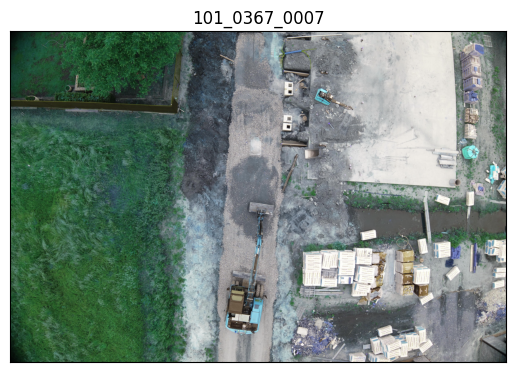

In [69]:
imgNode = ImageNode(path=r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\img\101_0367_0007.JPG", getResource=True)
imgNode.show()


## PanoNode

In [ ]:
_cartesianTransform = None
if _cartesianTransform is None:
    #you could initialize a pano in an upright position instead of forward to match a terrestrial vantage point
    rotation_matrix_90_x=np.array( [[ 1, 0, 0.],
                                    [ 0, 0,-1 ],
                                    [ 0, 1, 0 ]])  
    _cartesianTransform = gmu.get_cartesian_transform(rotation=rotation_matrix_90_x)    

## MeshNode

### todo

- pointcount enkel getter

In [1]:
from context import geomapi
from geomapi.nodes import MeshNode, Node

node= MeshNode(graphPath=r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\graphs\mesh_graph.ttl")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
asTexture
disjoint
Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.


In [2]:
print(len(node.get_graph()))
print(node.get_graph().serialize())


The euler angles are derived from the rotation matrix, please note that this representation has a number of disadvantages
12
The euler angles are derived from the rotation matrix, please note that this representation has a number of disadvantages
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix geomapi: <https://w3id.org/geomapi#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://meshes#parking> a geomapi:MeshNode ;
    rdfs:label "parking"^^xsd:string ;
    dcterms:created "2023-11-23T10:08:36"^^xsd:dateTime ;
    geomapi:asTexture "../mesh/parking.png"^^xsd:string ;
    geomapi:cartesianTransform """[[ 1.          0.          0.         46.63125556]
 [ 0.          1.          0.         54.52760084]
 [ 0.          0.          1.          5.31630357]
 [ 0.          0.          0.          1.        ]]"""^^geomapi:matrix ;
    geomapi:convexHull """[[79.30310822 66.61947632  7.10898209]
 [18.00027466 61.07197189 

## Property updates

In [ ]:
attr_handlers = { #this is dealing with exceptions
            'type': lambda attr, obj: setattr(self, 'className', ut.get_ifcopenshell_class_name(obj)) if 'IFC' in obj else None, #not sure if this works
            'label': lambda attr, obj: setattr(self, 'name', obj),
            'created': lambda attr, obj: setattr(self, 'timestamp', obj),
            # 'objectType': lambda attr, obj: setattr(self, 'objectType', obj.split('/')[-1]), 
            'IfcGloballyUniqueId': lambda attr, obj: setattr(self, 'globalId', obj),
            'objectType_IfcObject': lambda attr, obj: setattr(self, 'objectType', obj),
            'imageLength': lambda attr, obj: setattr(self, 'imageHeight', obj), #not sure
            'hasPart': lambda attr, obj: setattr(self, 'linkedSubjects', [str(obj) for obj in self._graph.objects(subject=self._subject, predicate=GEOMAPI_PREFIXES['geomapi'].hasPart)]),
        }

#NODE
excludedList=['graph','resource','graphPath','subject','resource','fullResourcePath','kwargs', 'orientedBoundingBox','type']
#BIMNODE    
excludedList.extend(['ifcElement'])
#MESHNODE
excludedList.extend(['mesh'])
#IMGNODE
excludedList.extend(['exifData','xmlData','image','features2d','pinholeCamera'])
#PCDNODE
excludedList.extend(['pcd','e57Pointcloud','e57xmlNode','e57image','features3d'])
#SESSIONNODE
excludedList.extend(['linkedNodes'])


#OPENLABEL
if attribute in ['timestamp','sensor']:
    return openlabel[attribute]
#E57
elif attribute in ['cartesianBounds','cartesianTransform','geospatialTransform','pointCount','e57XmlPath','e57Path','e57Index','e57Image']:
    return  e57[attribute]
#GOM
elif attribute in ['coordinateSystem']:
    return  gom[attribute]
#IFC
elif attribute in ['ifcPath','className','globalId','phase','ifcName']:
    return  ifc[attribute]
#EXIF
elif attribute in ['xResolution','yResolution','resolutionUnit','imageWidth','imageHeight']:
    return  exif[attribute]
#XCR
elif attribute in ['focalLength35mm','principalPointU','principalPointV','distortionCoeficients','gsd']:
    return  xcr[attribute]
#XCR
elif attribute in ['isDerivedFromGeometry']:
    return  omg[attribute]
#V4D
else:
    return v4d[attribute]

In [ ]:
Node.subject
Node.graphPath
Node.graph
Node.path    
Node.name
Node.timestamp
Node.resource 
Node.orientedBoundingBox
Node.convexHull
Node.cartesianTransform

Node._set_attributes_from_graph
Node._set_geometric_properties

Node.get_center
Node.load_resource
Node.get_graph
Node.save_graph
Node.transform
Node.show

## BIMNode

_get_metadata_from_ifc_path(), what do you want from this?

In [10]:
from context import geomapi
from geomapi.nodes import BIMNode, Node
import geomapi.nodes.bimnode_copy as old

node = Node(name="node")
node.timestamp

'2025-04-16T15:43:27'

In [11]:
from context import geomapi
from geomapi import tools
path = r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\ifc\parking.ifc"
#newNode = tools.ifc_to_nodes_multiprocessing(path)[0]

In [12]:
bimNode = BIMNode(ifcPath=path)
oldBimNode = old.BIMNode(ifcPath=path)
print(bimNode.className, bimNode.globalId, bimNode.name, bimNode.subject)
print(oldBimNode.className, oldBimNode.globalId, oldBimNode.name, oldBimNode.subject)

#81337=IfcSlab('09z8paHqr5lhEm4DuOUPM_',#20,'174_SFO_Pile:type 1 CS 800kN/TS 250kN:1655763',$,'174_SFO_Pile:type 1 CS 800kN/TS 250kN',#81323,#81336,'1655763',.BASESLAB.)
checking if file exists
IfcSlab 09z8paHqr5lhEm4DuOUPM_ 174_SFO_Pile:type 1 CS 800kN/TS 250kN:1655763 http://174_SFO_Pile_type_1_CS_800kN_TS_250kN_1655763_09z8paHqr5lhEm4DuOUPM_
IfcMember 3M75Mhp4L2Aei641BocJFE Circular Mullion:Grouting pile 680mm:1072623 http://Circular_Mullion_Grouting_pile_680mm_1072623_3M75Mhp4L2Aei641BocJFE


In [13]:
bimNode.__class__.__name__[:-4]

'BIM'

In [ ]:
"""
**BIMNode** is a Python Class to govern the data and metadata of BIM data. 
This node builds upon the [Open3D](https://www.open3d.org/) and [ifcopenshell](https://ifcopenshell.org/) API for the BIM definitions.
Be sure to check the properties defined in those abstract classes to initialise the Node.

.. image:: ../../../docs/pics/graph_ifc1.png

**IMPORTANT**: The current BIMNode class is designed from a geospatial perspective to 
use in geometric analyses. As such, it's geometry is defined by Open3D.geometry.TriangleMesh objects 
and contains only a skeleton set of IFC Information. Users should use this class to conduct their analyses
and then combine it with the existing IFC files or IFCOWL RDF variants to integrate the results.

"""
#IMPORT PACKAGES
import os
from pathlib import Path
from typing import Optional
import open3d as o3d 
import numpy as np 
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.util
import ifcopenshell.util.selector
import trimesh
import uuid
from rdflib import XSD, Graph, URIRef
from rdflib.namespace import RDF

#IMPORT MODULES
# from geomapi.nodes import GeometryNode
from geomapi.nodes import Node
import geomapi.utils as ut
from geomapi.utils import GEOMAPI_PREFIXES, rdf_property
import geomapi.utils.geometryutils as gmu

class BIMNode (Node):
    def __init__(self,  
                subject: Optional[URIRef] = None,
                graph: Optional[Graph] = None,
                graphPath: Optional[Path] = None,
                name: Optional[str] = None,
                path: Optional[Path] = None,
                timestamp: Optional[str] = None,
                resource = None,
                cartesianTransform: Optional[np.ndarray] = None,
                orientedBoundingBox: Optional[o3d.geometry.OrientedBoundingBox] = None,
                convexHull: Optional[o3d.geometry.TriangleMesh] =None,
                loadResource: bool = False,
                ifcPath : Path = None,                        
                globalId : str = None,
                className : str = None,
                objectType : str = None,
                **kwargs): 
        """Creates a BIMNode. Overloaded function.
        
        This Node can be initialised from one or more of the inputs below.
        By default, no data is imported in the Node to speed up processing.
        If you also want the data, call node.get_resource() or set getResource() to True.
        
        **Warning**: never attach an IfcElement to a node directly as this is very unstable!

        Args:
            - subject (RDFlib URIRef) : subject to be used as the main identifier in the RDF Graph
            
            - graph (RDFlib Graph) : Graph with a single subject (if multiple subjects are present, only the first will be used to initialise the Node)
            
            - graphPath (Path) :  Graph file path with a single subject (if multiple subjects are present, only the first will be used to initialise the Node)
            
            - path (Path) : Path to mesh .obj or .ply file (data is not automatically loaded)
            
            - resource (o3d.geometry.TriangleMesh, ifcopenshell.entity_instance) : Open3D Triangle mesh data from trimesh, open3d or ifcopenshell. 
            
            - ifcPath (str|Path) : path to IFC file
            
            - globalId (str) : IFC globalId
            
            - className (str) : IFC className e.g. IfcWall, IfcBeam, IfcSlab, etc.
            
            - objectType (str) : IFC object type e.g.  i.e. Floor:232_FL_Concrete CIP 400mm
            
            - getResource (bool, optional= False) : If True, the node will search for its physical resource on drive 
                            
        Returns:
            BIMNode : A BIMNode with metadata 
        """           

        
        #set properties
        self.ifcPath=ifcPath
        self.globalId=globalId
        self.className=className
        self.objectType=objectType

        super().__init__(   subject = subject,
                            graph = graph,
                            graphPath = graphPath,
                            name = name,
                            path = path,
                            timestamp = timestamp,
                            resource = resource,
                            cartesianTransform = cartesianTransform,
                            orientedBoundingBox = orientedBoundingBox,
                            convexHull = convexHull,
                            loadResource = loadResource,
                            **kwargs) 
                     

        #initialisation functionality
        self._get_metadata_from_ifc_path() if self.ifcPath else None

#---------------------PROPERTIES----------------------------

    #---------------------ifcPath----------------------------
    @property
    @rdf_property(datatype=XSD.string)
    def ifcPath(self): 
        """The path (Path) of the ifc file."""
        return self._ifcPath

    @ifcPath.setter
    def ifcPath(self,value:Path):
        if value is None:
           self._ifcPath = None
        elif Path(value).suffix.upper() in ut.get_node_resource_extensions(self):
            self._ifcPath=Path(value)
        else:
            raise ValueError('ifcPath invalid extension.')

    #---------------------globalId----------------------------
    @property
    @rdf_property(predicate= GEOMAPI_PREFIXES['ifc'].IfcGloballyUniqueId, datatype=XSD.string)
    def globalId(self): 
        """The GlobalId (str) of the node that originates from an ifc file."""
        if self._globalId:
            pass 
        elif os.path.exists(self.ifcPath): # takes first element, not sure if this is good!
            ifc = ifcopenshell.open(self.ifcPath)
            print(ifc)
            ifcElement=next((ifcElement for ifcElement in ifcopenshell.util.selector.filter_elements(ifc,"IfcElement")),None)
            print(ifcElement)
            self._globalId=ifcElement.GlobalId if ifcElement else None
            print("checking if file exists")
        return self._globalId

    @globalId.setter
    def globalId(self,value:str):
        if value is None:
            self._globalId = None
        else:
            self._globalId=str(value)
            
    #---------------------className----------------------------
    @property
    @rdf_property()
    def className(self): 
        """The IFC className (str) of the node that originates from an ifc file. 
        
        **Note**: This must be a IFC formatted class name e.g. IfcWall, IfcBeam, IfcSlab, etc.
        """
        if(self._className is None):
            self._className='IfcBuildingElement'
        return self._className

    @className.setter
    def className(self,value:str):
        if value is None:
            self._className = None
        else:
            self._className=str(value)
            
    #---------------------objectType----------------------------
    @property
    @rdf_property(predicate= GEOMAPI_PREFIXES['ifc'].objectType_IfcObject, datatype=XSD.string)
    def objectType(self): 
        """The IFC objectType (str) of the node that originates from an ifc file. 
        
        **Note**: In most software, this is the family or type name of the object, which contains information of the material composition i.e. Floor:232_FL_Concrete CIP 400mm
        """
        return self._objectType

    @objectType.setter
    def objectType(self,value:str):
        if value is None:
            self._objectType = None
        else:
            self._objectType=str(value)

#---------------------PROPERTY OVERRIDES----------------------------

    @Node.subject.getter
    def subject(self) -> URIRef:
        """The subject of the node. If no subject is present, it is gathered from the following parameters or given a unique GUID.
        
        Args:
            - self._graph
            - self._path
            - self._name
            - uuid.uuid1() guid
            
        Returns:
            - subject (URIREF)
        """
        #subject
        if self._subject:
            pass
        # self.graph
        elif self.graph:
            self._subject=next(self.graph.subjects(RDF.type))
        #self.path
        elif self.path:
            self.globalId=self.path.stem.split('_')[-1]
            #name=self.path.stem
            #self.name=name.replace('_'+self.globalId,'')
            self._subject=URIRef('http://'+ut.validate_string(self.path.stem))
        #self_name
        elif self.name:
            self._subject=URIRef('http://'+ut.validate_string(self.name))
        #guid
        else:
            #self.name=str(uuid.uuid1())
            self._subject=URIRef('http://'+self._name)            
        return self._subject

    @property
    def resource(self):
        return super().resource
    
    @resource.setter
    def resource(self,value):
        """Set self.resource (o3d.geometry.TriangleMesh) of the Node.

        Args:
            - o3d.geometry.TriangleMesh 
            - trimesh.base.Trimesh
            - ifcopenshell.entity_instance (this also sets the name, subject, etc.)

        Raises:
            ValueError: Resource must be ao3d.geometry.TriangleMesh, trimesh.base.Trimesh or ifcopenshell.entity_instance with len(mesh.triangles) >=1.
        """
        if(value is None):
            self._resource = None
        elif isinstance(value,o3d.geometry.TriangleMesh) and len(value.triangles) >=1:
            self._resource = value
        elif isinstance(value,trimesh.base.Trimesh):
            self._resource = value.as_open3d
        elif isinstance(value,ifcopenshell.entity_instance):
            self._resource= gmu.ifc_to_mesh(value)

            self.name=value.Name
            self.className=value.is_a()
            self.globalId=value.GlobalId
            self.objectType=value.ObjectType
            self.faceCount=len(self._resource.triangles)
            self.pointCount=len(self._resource.vertices)
            self.subject= self.name +'_'+self.globalId

        else:
            raise ValueError('Resource must be ao3d.geometry.TriangleMesh, trimesh.base.Trimesh or ifcopenshell.entity_instance with len(mesh.triangles) >=1')
    
#---------------------METHODS----------------------------

    
    def load_resource(self)->o3d.geometry.TriangleMesh: 
        """Returns the mesh data in the node. If none is present, it will search for the data on using the attributes below.
        
        **NOTE**: The resource is only loaded if len(resource.triangles) >2.
        
        **NOTE**: If the resource is an ifcopenshell.entity_instance, the mesh is generated from the IFC data. This is an error prone process and not all IFC data can be converted to a mesh.

        Args:
            - self.path
            - self.ifcPath

        Returns:
            o3d.geometry.TriangleMesh or None
        """
        # Perform path checks
        super().load_resource(self)

        if self.path:
            resource =  o3d.io.read_triangle_mesh(str(self.path))
            if len(resource.triangles)>2:
                self._resource = resource
        elif self.ifcPath and os.path.exists(self.ifcPath):
            try:
                ifc = ifcopenshell.open(self.ifcPath)   
                ifcElement= ifc.by_guid(self.get_globalId())
                self._resource=gmu.ifc_to_mesh(ifcElement)
            except:
                print('mesh=gmu.ifc_to_mesh(ifcElement) error')
        if getattr(self,'faceCount',None) is None and self._resource:
            self.faceCount=len(self._resource.triangles)
        if getattr(self,'pointCount',None) is None and self._resource:
            self.pointCount=len(self._resource.vertices)
        return self._resource  


    def save_resource(self, directory:str=None,extension :str = '.ply') ->bool:
        """Export the resource of the Node.

        Args:
            - directory (str, optional) : directory folder to store the data.
            - extension (str, optional) : file extension. Defaults to '.ply'.

        Raises:
            ValueError: Unsuitable extension. Please check permitted extension types in utils._init_.

        Returns:
            bool: return True if export was succesful
        """          
        #check path
        if self.resource is None:
            return False
        
        #validate extension
        if extension.upper() not in ut.MESH_EXTENSIONS:
            raise ValueError('Invalid extension')

        # check if already exists
        if directory and os.path.exists(os.path.join(directory,self.subject + extension)):
            self.path=os.path.join(directory,self.subject + extension)
            return True
        elif not directory and self.get_path() and os.path.exists(self.path) and extension.upper() in ut.MESH_EXTENSIONS:
            return True
                    
        #get directory
        if (directory):
            pass    
        elif self.path is not None:    
            directory= Path(self.path).parent          
        elif(self.graphPath): 
            dir= Path(self.graphPath).parent
            directory=os.path.join(dir,'BIM')   
        else:
            directory=os.path.join(os.getcwd(),'BIM')
        # create directory if not present
        if not os.path.exists(directory):                        
            os.mkdir(directory) 

        self.path=os.path.join(directory,Path(self.subject.toPython()).stem  + extension) #subject.toPython() replaced by get_name()

        #write files
        if o3d.io.write_triangle_mesh(str(self.path), self.resource):
            return True
        return False
    
    
    def _get_metadata_from_ifc_path(self) -> bool:
        """Sets the metadata of the node from the ifc file.

        Args:
            - self._ifcPath
            - self._globalId

        Args:
            - globalId 
            - name 
            - className
            - objectType

        Returns:
            bool: True if exif data is successfully parsed
        """        
        if (not self.ifcPath or 
            not os.path.exists(self.ifcPath) or
            not self.globalId):
            print(self.globalId)
            return False
        
        if self._graph:
            return True
        
        if self.name and self.className: #this is super dangerous!
            return True
        print("checking ifc")
        ifc = ifcopenshell.open(self.ifcPath)   
        ifcElement= ifc.by_guid(self.globalId)
        if ifcElement:
            self.name=ifcElement.Name 
            self.className=ifcElement.is_a()   
            self.objectType=ifcElement.ObjectType #get_info()['ObjectType']  #don't we want this full dictionary like ref height ?
            if self.name and self.globalId:
                self.subject= self.name +'_'+self.globalId 
            return True
        else:
            return False
     
    def show(self):
        super().show()
        gmu.show_geometries([self.resource])
       

## ImageNode

### todo

keypoints and descriptors beter documenteren

### XMP is similar to RDF, marse the same?

In [21]:
import xml.etree.ElementTree as ET
from context import geomapi
import geomapi.utils as ut
from geomapi.utils import rdf_property, GEOMAPI_PREFIXES
from pathlib import Path

xmpPath = Path(r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\img\DJI_0085.xmp")

mytree = ET.parse(xmpPath)
root = mytree.find('.//rdf:Description', GEOMAPI_PREFIXES)
print(mytree)
print(root)
print(root.keys())
print(GEOMAPI_PREFIXES['rdf'].Description)

timestamp=ut.get_timestamp(xmpPath)
name=xmpPath.stem
subject=name
for child in root.iter():
    #Attributes
    for attribute in child.attrib:
        print(attribute)

<Element '{http://www.w3.org/1999/02/22-rdf-syntax-ns#}Description' at 0x000001D14D606930>
['{http://www.capturingreality.com/ns/xcr/1.1#}Version', '{http://www.capturingreality.com/ns/xcr/1.1#}PosePrior', '{http://www.capturingreality.com/ns/xcr/1.1#}Coordinates', '{http://www.capturingreality.com/ns/xcr/1.1#}DistortionModel', '{http://www.capturingreality.com/ns/xcr/1.1#}FocalLength35mm', '{http://www.capturingreality.com/ns/xcr/1.1#}Skew', '{http://www.capturingreality.com/ns/xcr/1.1#}AspectRatio', '{http://www.capturingreality.com/ns/xcr/1.1#}PrincipalPointU', '{http://www.capturingreality.com/ns/xcr/1.1#}PrincipalPointV', '{http://www.capturingreality.com/ns/xcr/1.1#}CalibrationPrior']
http://www.w3.org/1999/02/22-rdf-syntax-ns#Description
{http://www.capturingreality.com/ns/xcr/1.1#}Version
{http://www.capturingreality.com/ns/xcr/1.1#}PosePrior
{http://www.capturingreality.com/ns/xcr/1.1#}Coordinates
{http://www.capturingreality.com/ns/xcr/1.1#}DistortionModel
{http://www.capturi

In [7]:
import xml.etree.ElementTree as ET
from context import geomapi
import geomapi.utils as ut
from geomapi.utils import rdf_property, GEOMAPI_PREFIXES
from pathlib import Path

xmpPath = Path(r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\img\DJI_0085.xmp")

# Parse XML
root = ET.parse(xmpPath)

# Find the Description element
description = root.find('.//rdf:Description', GEOMAPI_PREFIXES)
for child in description.iter():
    print(child)
    for attribute in child.attrib:
                print(attribute)

# Extract attributes
attrs = description.attrib
for key, val in attrs.items():
    print(f"{key}: {val}")

# Extract nested elements
rotation = description.find('xcr:Rotation', GEOMAPI_PREFIXES).text
position = description.find('xcr:Position', GEOMAPI_PREFIXES).text
distortion = description.find('xcr:DistortionCoeficients', GEOMAPI_PREFIXES).text

print("\nRotation:", rotation)
print("Position:", position)
print("Distortion Coefficients:", distortion)

<Element '{http://www.w3.org/1999/02/22-rdf-syntax-ns#}Description' at 0x0000025A2BDE70B0>
{http://www.capturingreality.com/ns/xcr/1.1#}Version
{http://www.capturingreality.com/ns/xcr/1.1#}PosePrior
{http://www.capturingreality.com/ns/xcr/1.1#}Coordinates
{http://www.capturingreality.com/ns/xcr/1.1#}DistortionModel
{http://www.capturingreality.com/ns/xcr/1.1#}FocalLength35mm
{http://www.capturingreality.com/ns/xcr/1.1#}Skew
{http://www.capturingreality.com/ns/xcr/1.1#}AspectRatio
{http://www.capturingreality.com/ns/xcr/1.1#}PrincipalPointU
{http://www.capturingreality.com/ns/xcr/1.1#}PrincipalPointV
{http://www.capturingreality.com/ns/xcr/1.1#}CalibrationPrior
<Element '{http://www.capturingreality.com/ns/xcr/1.1#}Rotation' at 0x0000025A2BDE7010>
<Element '{http://www.capturingreality.com/ns/xcr/1.1#}Position' at 0x0000025A2BDE6FC0>
<Element '{http://www.capturingreality.com/ns/xcr/1.1#}DistortionCoeficients' at 0x0000025A2BDE6DE0>
{http://www.capturingreality.com/ns/xcr/1.1#}Version: 

In [9]:
from geomapi.nodes import ImageNode

node = ImageNode(xmpPath=xmpPath)
node.cartesianTransform


{http://www.capturingreality.com/ns/xcr/1.1#}Version
{http://www.capturingreality.com/ns/xcr/1.1#}PosePrior
{http://www.capturingreality.com/ns/xcr/1.1#}Coordinates
{http://www.capturingreality.com/ns/xcr/1.1#}DistortionModel
{http://www.capturingreality.com/ns/xcr/1.1#}FocalLength35mm
{http://www.capturingreality.com/ns/xcr/1.1#}Skew
{http://www.capturingreality.com/ns/xcr/1.1#}AspectRatio
{http://www.capturingreality.com/ns/xcr/1.1#}PrincipalPointU
{http://www.capturingreality.com/ns/xcr/1.1#}PrincipalPointV
{http://www.capturingreality.com/ns/xcr/1.1#}CalibrationPrior


array([[-8.13902571e-02,  9.96648497e-01, -8.20972697e-03,
         5.18276221e+01],
       [ 6.83059476e-01,  4.97790854e-02, -7.28664391e-01,
         6.10007435e+01],
       [-7.25813597e-01, -6.49139139e-02, -6.84821733e-01,
         1.50408221e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## panoNode

### todo

all depth information to tools behalve deth float value

In [ ]:
##

## LineSetNode

In [ ]:
from context import geomapi
from geomapi.nodes import LineSetNode
import open3d as o3d

node = LineSetNode()

node.resource = o3d.geometry.LineSet.create_from_triangle_mesh(o3d.geometry.TriangleMesh.create_box())

print(node.lineCount)

AttributeError: 'open3d.cpu.pybind.geometry.LineSet' object has no attribute '__set__'

# Tools

## Base Tools

In [ ]:
from geomapi import tools
import open3d as o3d
cloud = o3d.geometry.PointCloud()
tools.create_node(resource = cloud)

In [2]:
from context import geomapi
import geomapi.tools as tl
import rdflib

graphPath=r"C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\graphs\resources_graph.ttl"

instances = tl.instantiate_nodes_from_graph(graphPath)

for instance in instances:
    print(type(instance), "->" , instance.subject, ", ", instance.path)

Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
<class 'geomapi.nodes.meshnode.MeshNode'> -> http://resources#parking_mesh ,  C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\mesh\parking.obj
<class 'geomapi.nodes.imagenode.ImageNode'> -> http://resources#DJI_0085 ,  C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\img\DJI_0085.JPG
<class 'geomapi.nodes.imagenode.ImageNode'> -> http://resources#IMG_8834 ,  C:\Users\jelle\Documents\DoctoraatLocal\geomapi\tests\testfiles\img\IMG_8834.JPG
<class 'geomapi.nodes.pointcloudnode.PointCloudNode'>

### todo

img_xml_to_nodes ook subjects filteren dan kan de image xml weg

In [ ]:
from geomapi.nodes import *
from typing import List,Tuple, Union
import pye57
import geomapi.tools as tl

### Node Creation from files

#### Graph to Nodes

In [ ]:
#Combine into one:
def graph_to_nodes(graphPath: str, graph : Graph, subjects: List, loadResource = False, **kwargs) -> List[Node]:
    """Convert a graph to a set of Nodes. from either a graphpath, graph, with optional subject filters"""
    # We always prefer graphpath, because then we can load the resources
    pass
"""
def graph_to_nodes(graph : Graph,**kwargs) -> List[Node]:
    "Convert a graph to a set of Nodes."
    # We don't know the root of the node so we cannot load resources
    pass
def graph_path_to_nodes(path : str,**kwargs) -> List[Node]:
    "Convert a graphPath to a set of Nodes."
    graph = Graph().parse(path)
    graph_to_nodes(graph)

# graph to nodes with subject filter?
def create_node(graph: Graph = None, graphPath: str =None, subject: URIRef = None, resource = None, **kwargs)-> Node:
    Create Node from various optional inputs i.e. graphs, graphPaths, etc."
    pass

# There is a lot of ambiguity with meshes and images which node they belong to
def resources_to_nodes(resources) -> None:
    Create Nodes from a set of data resources."
    pass
"""

#### xml to Nodes

In [ ]:
# from e57 .xml
def e57xml_to_pointcloud_nodes(path :str,loadResource = False, **kwargs) -> List[PointCloudNode]:
    """Parse XML file that is created with E57lib e57xmldump.exe."""
    pass

# xml from MetaShape
def xml_to_image_nodes(path :str,skip:int=None, filterByFolder:bool=False,loadResource = False,**kwargs) -> List[ImageNode]:
    """Parse XML file that is created with https://www.agisoft.com/."""
    pass


#### e57 to Nodes

In [ ]:
# load from .e57 file

def e57_to_pointcloud_nodes(e57Path, subjects, percentage,loadResource = False,) -> List[PointCloudNode]:
    pass
"""
# we kunnen deze combineren en vanaf dat de scancount boven een bepaald getal komt, automatisch switchen naar multiprocessing
def e57path_to_nodes(path:str,percentage:float=1.0) ->List[PointCloudNode]:
    "Load an e57 file and convert all data to a list of PointCloudNodes."
    path=Path(path) if path else None
    e57 = pye57.E57(str(path))
    count = e57.scan_count

def e57path_to_nodes_mutiprocessing(path:str,percentage:float=1.0) ->List[PointCloudNode]:
    "Load an e57 file and convert all data to a list of PointCloudNodes."
    pass
# This feels obsolete
def e57header_to_nodes(path:str, **kwargs) -> List[PointCloudNode]:
    "Parse e57 file header that is created with E57lib e57xmldump.exe."
    pass
"""

#### dxf to Nodes

In [ ]:

# dxf from autocad
def dxf_to_lineset_nodes(dxfPath:str |Path, **kwargs) -> List[LineSetNode]:
    """Parse a dxf file to a list of LineSetNodes."""
    pass
# dxf from metashape?
def dxf_to_ortho_nodes(dxfPath: Union[str, Path], name_filter: str = None, **kwargs) -> List[OrthoNode]:
    """Parse a DXF file into a list of OrthoNode objects."""
    pass


#### ifc to Nodes

In [ ]:
def ifc_to_bim_nodes(path:str,types:list=['IfcBuildingElement'], guids:list = None,classes:str='IfcBuildingElement',getResource : bool=True,**kwargs)-> List[BIMNode]:
    """Parse ifc file to a list of BIMNodes, one for each ifcElement.\n"""
    #Type vs classes??
    pass

# Obsolete
"""
def ifc_to_nodes_by_guids(path:str, guids:list,getResource : bool=True,**kwargs)-> List[BIMNode]:
    "Parse ifc file to a list of BIMNodes, one for each ifcElement.\n"
    pass

def ifc_to_nodes_by_type(path:str, types:list=['IfcBuildingElement'],getResource : bool=True,**kwargs)-> List[BIMNode]:
    "Parse ifc file to a list of BIMNodes, one for each ifcElement.\n"
    pass
"""
# why is the workflow so different?
def ifc_to_nodes_multiprocessing(path:str, **kwargs)-> List[BIMNode]:
    """Returns the contents of geometry elements in an ifc file as BIMNodes.
    This method is 3x faster than other parsing methods due to its multi-threading.
    However, only the entire ifc can be parsed."""
    pass

#### Navvis csv to Nodes

In [ ]:
#achterhaald
def navvis_csv_to_pano_nodes(csvPath :Path, 
                        directory : Path = None, 
                        includeDepth : bool = True, 
                        depthPath : Path = None, 
                        skip:int=None, **kwargs) -> List[PanoNode]:
    """Parse Navvis csv file and return a list of PanoNodes with the csv metadata."""
    pass


#### navvis tools

In [ ]:
def navvis_decode_depthmap():
    """convert the 4 channel rgbd encoding to a single channel float array"""
    pass

### ifc Tools

In [ ]:
def get_loaclasses_from_ifcclass(ifcClass:str)->URIRef:
    """ Return the matching LOA class given a ifcClass e.g. IfcWall -> URIRef('https://B2010_EXTERIOR_WALLS').
    The returned subjects can be used to retreive the LOAm and LOAr values from the LOA graph.  """
    pass

def get_ifcclasses_from_loaclass(loaClass:str)->Literal:
    pass

def create_default_loa_graph(path:str=None)->Graph:
    """Generates a Graph from the default USIBD_SPC-LOA_C220_2016_ver0_1 specification. This specification contains information on the accuraycy
    of building documentation and representation. """
    pass

def parse_loa_excel(path:str) -> Graph:
    """Parse an USIBD_SPC-LOA_C220_2016_ver0_1.xlsx spreadsheet that contains meaured/represented accuracy parameters for building documentation procedures.
    The returned graph can be used by GEOMAPI or other linked data processes to validate remote sensing/BIM models. """
    pass

def get_loa_class_per_bimnode(BIMNodes:List[BIMNode] , path:str=None):
    """Assigns the accuracy properties of an LOA Excel spreadsheet to the list of BIMNodes. 
    The assignment is based on the ifc classNames which are mapped to LOA classes. """
    pass

### Node Selection

##### Original functions

In [ ]:
def select_nodes_k_nearest_neighbors(node:Node,nodelist:List[Node],k:int=10) -> Tuple[List [Node], o3d.utility.DoubleVector]:
    """ Select k nearest nodes based on Euclidean distance between centroids.\n"""
    pass
# this is just closest neighbors with threshold
def select_nodes_with_centers_in_radius(node:Node,nodelist:List[Node],r:float=0.5) -> Tuple[List [Node] ,List[float]]:
    """Select nodes within radius of the node centroid based on Euclidean distance between node centroids.\n"""
    pass
def select_nodes_with_centers_in_bounding_box(node:Node,nodelist:List[Node],u:float=0.5,v:float=0.5,w:float=0.5) -> List [Node]: 
    """Select the nodes of which the center lies within the oriented Bounding Box of the source node given an offset.\n"""
    pass
def select_nodes_with_bounding_points_in_bounding_box(node:Node,nodelist:List[Node],u:float=0.5,v:float=0.5,w:float=0.5) -> List [Node]: 
    """Select the nodes of which atleast one of the bounding points lies within the oriented Bounding Box of the source node given an offset.\n"""
    pass
def select_nodes_with_intersecting_bounding_box(node:Node,nodelist:List[Node],u:float=0.5,v:float=0.5,w:float=0.5) -> List [Node]: 
    """Select the nodes of which the bounding boxes intersect.\n"""
    pass
def select_nodes_with_intersecting_resources(node:Node,nodelist:List[Node]) -> List [Node]: 
    """Select the nodes of which the o3d.geometry.TriangleMeshes intersect.\n"""
    pass

##### standardized functions

In [ ]:
#op basis van de convex hull zijn punten
def select_nodes_k_nearest_neighbors(nodes, hull, k):
    """get the k-nearest nodes from a centerpoint
    
    hull: this is the hull of which the bounding points will be used to look for nearest neighbors
    nodes: these referenes will have their convex hull sampled and used as a reference for the nearest neighbor evaluation

    return: return the k nearest nodes

    relationship adjacent
    """
    pass
def select_nodes_within_radius(nodes, hull, radius):
    """get the k-nearest nodes from a centerpoint
    
    hull: this is the hull of which the bounding points will be used to look for nearest neighbors
    nodes: these referenes will have their convex hull sampled and used as a reference for the nearest neighbor evaluation

    return: return the k nearest nodes

    
    relationship adjacent
    """
    pass
def select_nodes_within_bounding_box(nodes, bbox):
    "select the nodes who's center lie in the bounding box"
    pass
def select_nodes_within_convex_hull(nodes, hull):
    "select nodes which intersect with the bounding box"
    pass
def select_nodes_intersecting_bounding_box(nodes, bbox):
    "select nodes which intersect with the bounding box"
    pass
def select_nodes_intersecting_convex_hull(nodes, hull):
    "select nodes which intersect with the bounding box"
    pass

def get_node_relations(nodes):
    pass

### Graph Creation

In [ ]:
# can't you just directly create and merge the graphs without all the init binding, since it is also done on a node level?
def nodes_to_graph(nodelist : List[Node], path:str =None, overwrite: bool =False,save: bool =False,base: URIRef = None) -> Graph:
    """Convert list of nodes to an RDF graph."""
    pass